# Pulsars and Machine Learning

## Importing Libraries and Data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scikitplot.estimators import plot_learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from scikitplot.estimators import plot_learning_curve

In [2]:
df=pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Data Preparation

In [8]:
#Setting x and y and normalize the data
x_data=df.drop(columns='target_class')
y=df.target_class.values

#training and testing split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=123)
x_train_scaled=(x_train-np.min(x_train))/(np.max(x_train)-np.min(x_train)) #scaling
x_test_scaled=(x_test-np.min(x_train))/(np.max(x_train)-np.min(x_train))

## Vanilla Logistic Regression Model

Test accuracy: 96.70391061452513%


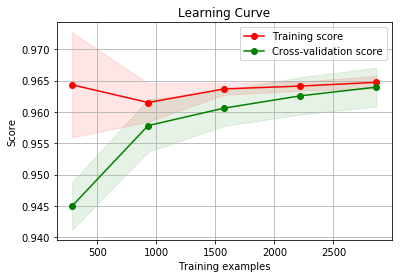

In [11]:
lr=LogisticRegression()
lr.fit(x_train_scaled, y_train)

compare_score=[]

lr_score=lr.score(x_test_scaled, y_test) * 100
compare_score.append(lr_score)

print('Test accuracy: {}%'.format(lr_score))

plot_learning_curve(lr, x_test_scaled, y_test)
plt.show()

Train accuracy: 97.61139823997766%


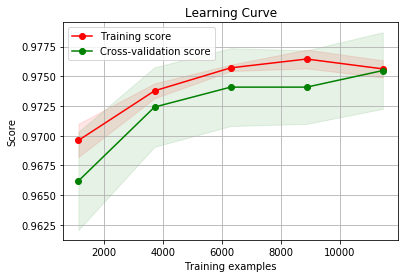

In [12]:
compare_score=[]

lr_train_score=lr.score(x_train_scaled, y_train) * 100
compare_score.append(lr_train_score)

print('Train accuracy: {}%'.format(lr_train_score))

plot_learning_curve(lr, x_train_scaled, y_train)
plt.show()

## Decision Tree

Accuracy = 95.95%


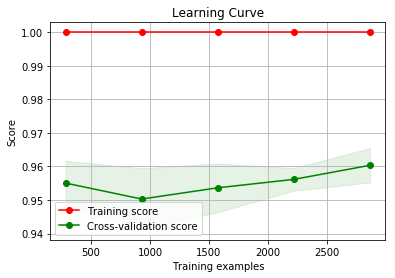

In [18]:
#We now make the classifier
classifier=AdaBoostClassifier(DecisionTreeClassifier())

#Training
classifier=classifier.fit(x_train_scaled, y_train)

#Predicting the response for the test dataset
y_pred=classifier.predict(x_test_scaled)

#Let's see how accurate our model is likely to be
score=round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print('Accuracy = {}%'.format(score))

plot_learning_curve(classifier, x_test_scaled, y_test)
plt.show()

## Artificial Neural Network

Train on 9593 samples, validate on 4725 samples
Epoch 1/15
9593/9593 [==============================] - 7s 773us/step - loss: 0.2303 - accuracy: 0.9337 - val_loss: 0.1279 - val_accuracy: 0.9587
Epoch 2/15
9593/9593 [==============================] - 4s 422us/step - loss: 0.0928 - accuracy: 0.9743 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 3/15
9593/9593 [==============================] - 4s 416us/step - loss: 0.0800 - accuracy: 0.9779 - val_loss: 0.0965 - val_accuracy: 0.9704
Epoch 4/15
9593/9593 [==============================] - 4s 415us/step - loss: 0.0777 - accuracy: 0.9786 - val_loss: 0.0949 - val_accuracy: 0.9712
Epoch 5/15
9593/9593 [==============================] - 3s 345us/step - loss: 0.0764 - accuracy: 0.9785 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 6/15
9593/9593 [==============================] - 3s 342us/step - loss: 0.0752 - accuracy: 0.9794 - val_loss: 0.0970 - val_accuracy: 0.9719
Epoch 7/15
9593/9593 [==============================] - 3s 348us/step - loss

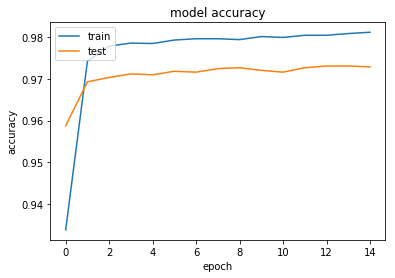

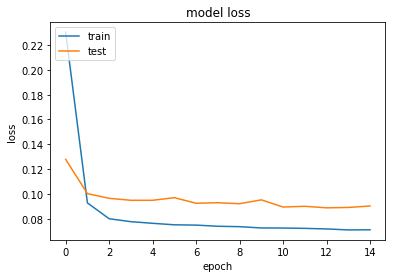

In [16]:
#making the classifier
classifier=Sequential()

#first hidden layer
#we have 8 input features, 1 output and the kernel_initializer uses a normal distribution to
#function
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=8))

#second
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#output
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#compiling the network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the data to the training set
history=classifier.fit(x_train_scaled, y_train, validation_split=0.33, batch_size=10, epochs=15)

#evaluate the loss value and metrics values for the model in test mode using evaluate funcn.
eval_model=classifier.evaluate(x_train_scaled, y_train)
print('eval_model: ', eval_model)

#prediction
y_pred=classifier.predict(x_test_scaled)
y_pred=(y_pred>0.5) #if prediction is greater than 0.5, output=1, otherwise=0

cm=confusion_matrix(y_test, y_pred)
print(cm)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()